<a href="https://colab.research.google.com/github/shaikehsan/Airline-Recommendation/blob/master/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import os

In [4]:
data = pd.read_excel("https://github.com/shaikehsan/dataset/raw/main/Airlines8.xlsx")

In [5]:
data['satisfaction'] = ''

In [6]:
data.head()


,airline,rating,cabin,seat_comfort,cabin_service,food_and_bev,entertainment,ground_service,value_for_money,recommended,satisfaction
0,Qatar Airways,6.0,Business Class,4.0,2.0,2.0,4.0,5.0,4.0,yes,
1,Qatar Airways,9.0,Business Class,5.0,5.0,5.0,4.0,3.0,3.0,yes,
2,Qatar Airways,9.0,Economy Class,4.0,5.0,4.0,5.0,5.0,5.0,yes,
3,Qatar Airways,10.0,Business Class,5.0,5.0,5.0,5.0,5.0,5.0,yes,
4,Qatar Airways,2.0,Business Class,1.0,2.0,3.0,4.0,1.0,1.0,no,


In [7]:
data['satisfaction'] =  ['Yes' if rating >= 6 else 'No' for rating in data['rating']]

In [8]:
data.head()

,airline,rating,cabin,seat_comfort,cabin_service,food_and_bev,entertainment,ground_service,value_for_money,recommended,satisfaction
0,Qatar Airways,6.0,Business Class,4.0,2.0,2.0,4.0,5.0,4.0,yes,Yes
1,Qatar Airways,9.0,Business Class,5.0,5.0,5.0,4.0,3.0,3.0,yes,Yes
2,Qatar Airways,9.0,Economy Class,4.0,5.0,4.0,5.0,5.0,5.0,yes,Yes
3,Qatar Airways,10.0,Business Class,5.0,5.0,5.0,5.0,5.0,5.0,yes,Yes
4,Qatar Airways,2.0,Business Class,1.0,2.0,3.0,4.0,1.0,1.0,no,No


In [9]:
data['airline'].value_counts()

Emirates                  1786
Qatar Airways             1445
Lufthansa                 1421
Etihad Airways            1290
Air India                  691
AirAsia                    627
IndiGo                     267
Saudi Arabian Airlines     245
flydubai                   201
Name: airline, dtype: int64

In [10]:
data.dtypes

airline             object
rating             float64
cabin               object
seat_comfort       float64
cabin_service      float64
food_and_bev       float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
satisfaction        object
dtype: object

In [11]:
label_encoder = LabelEncoder()

data['recommended'] = label_encoder.fit_transform(data['recommended'])
data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'])
data['cabin'] = label_encoder.fit_transform(data['cabin'])
data['airline'] = label_encoder.fit_transform(data['airline'])

data = data.dropna()

In [12]:
data['airline'].value_counts()

2    1059
6     898
3     732
5     523
0     276
7     101
8      73
1      44
4      24
Name: airline, dtype: int64

In [13]:
data.head()

,airline,rating,cabin,seat_comfort,cabin_service,food_and_bev,entertainment,ground_service,value_for_money,recommended,satisfaction
0,6,6.0,0,4.0,2.0,2.0,4.0,5.0,4.0,1,1
1,6,9.0,0,5.0,5.0,5.0,4.0,3.0,3.0,1,1
2,6,9.0,1,4.0,5.0,4.0,5.0,5.0,5.0,1,1
3,6,10.0,0,5.0,5.0,5.0,5.0,5.0,5.0,1,1
4,6,2.0,0,1.0,2.0,3.0,4.0,1.0,1.0,0,0


In [14]:
features = data.drop(['airline'],axis=1)
target = data['airline']

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=100)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
acc

In [16]:
pred = model.predict(x_test)

In [17]:
airline_mapping = {
    0: "Air India",
    1: "Saudi Arabian Airlines",
    2: "Emirates",
    3: "Lufthansa",
    4: "FlyDubai",
    5: "Etihad Airways",
    6: "Qatar Airways",
    7: "AirAsia",
    8: "IndiGo"
}
predicted_airline = airline_mapping[pred[0]]
print(predicted_airline)

Etihad Airways


In [18]:
pred[0]

5

In [19]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

<ipython-input-20-1b9b658aac1b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

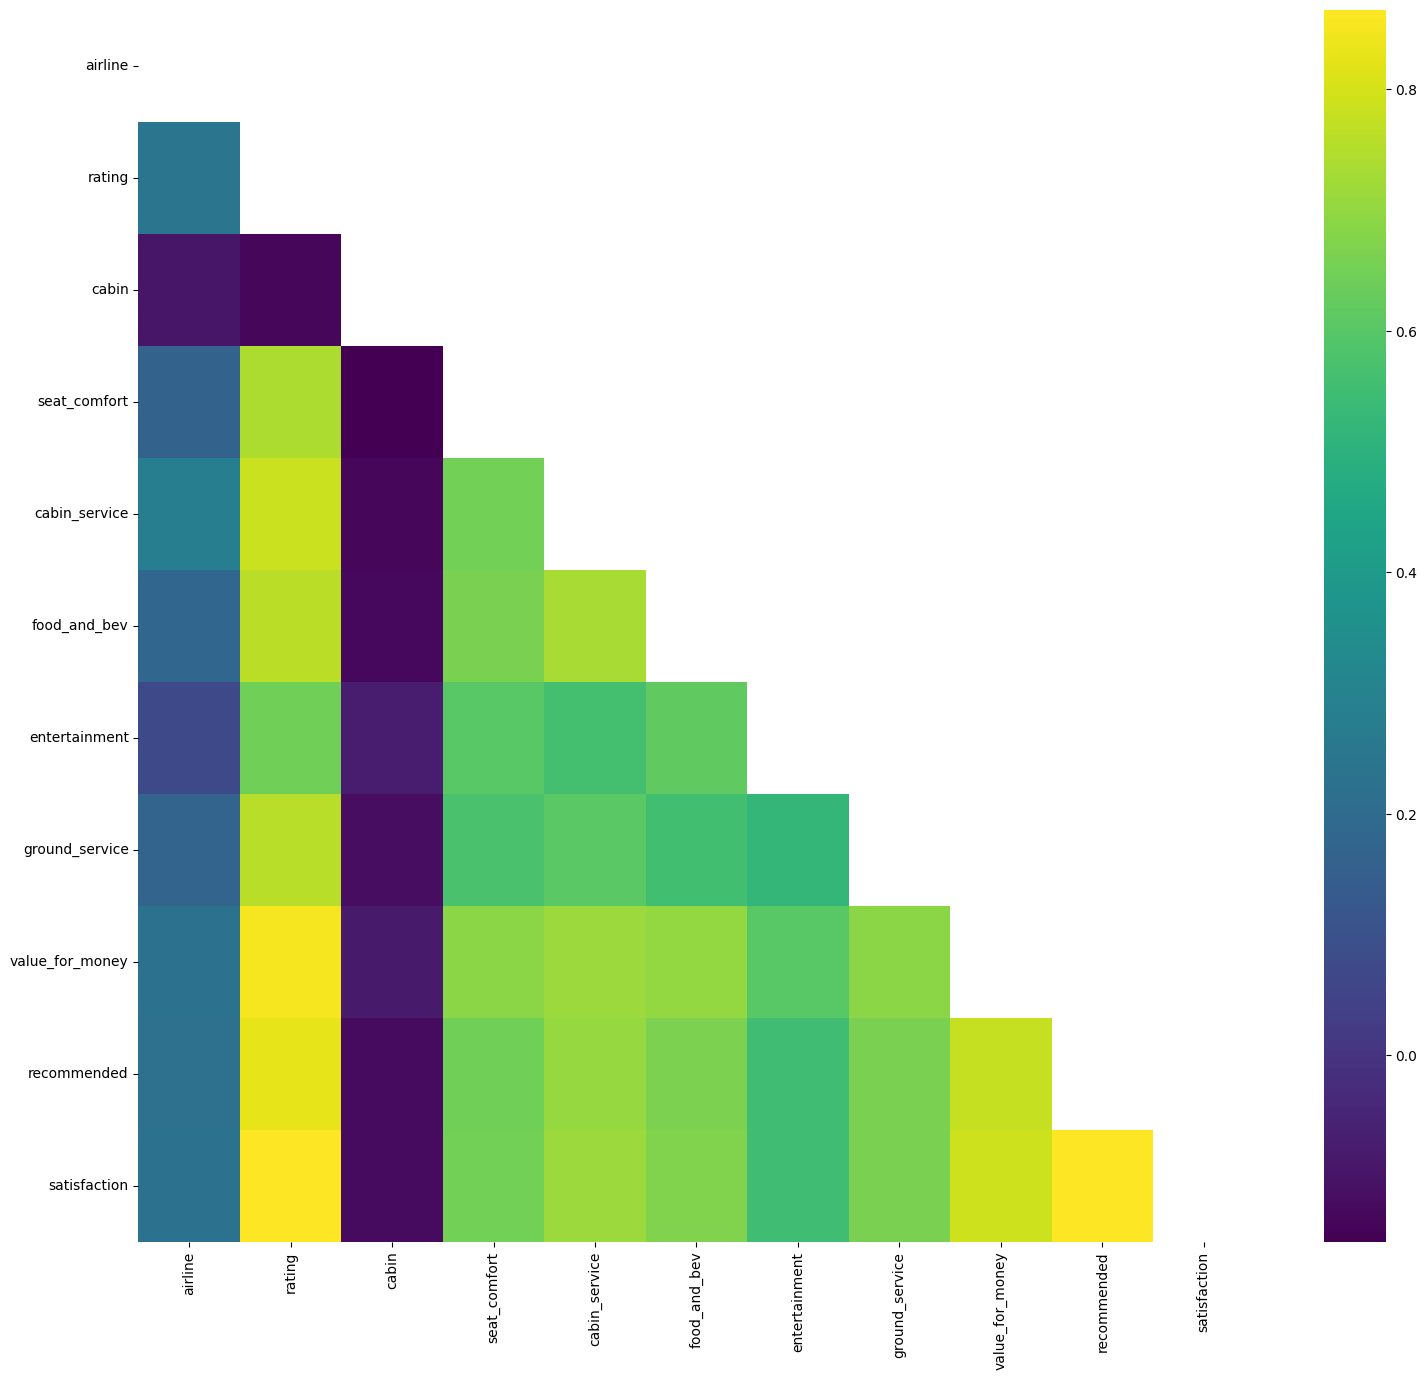

In [20]:
import matplotlib.pyplot as plt
import plotly.express as px

corr = data.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr , cmap="viridis" , mask=mask)

In [21]:
data.head()

,airline,rating,cabin,seat_comfort,cabin_service,food_and_bev,entertainment,ground_service,value_for_money,recommended,satisfaction
0,6,6.0,0,4.0,2.0,2.0,4.0,5.0,4.0,1,1
1,6,9.0,0,5.0,5.0,5.0,4.0,3.0,3.0,1,1
2,6,9.0,1,4.0,5.0,4.0,5.0,5.0,5.0,1,1
3,6,10.0,0,5.0,5.0,5.0,5.0,5.0,5.0,1,1
4,6,2.0,0,1.0,2.0,3.0,4.0,1.0,1.0,0,0
